# Outline:
1. Explore the problem/reason one would analyze the data set
2. Exploratory Data Analysis (EDA)
3. Modeling
4. Conclusions
5. Notes
6. References

**Problem definition:** The U.S. Army Corp of Engineers collected data of contaminated fish from toxic waste from a chemical plant located on the banks of a river in Alabama. Because of the river's location, these contaminated fish could contaminate other animals that may prey on the fish in a wide area.<br>

**Variables:**
- River
    - Tennessee river
    - Flint creek
    - Limestone creek
    - Spring creek
- Mile
- Species
    - Channel Catfish
    - Largemouth Bass
    - Smallmouth buffalofish
- Length
    - Centimeters (cm)
- Weight
    - Grams (g)
- DDT
    - Parts per million (ppm)

In [2]:
# BASE ---------------------------------
import numpy as np
import pandas as pd
from scipy import stats
import math

# VISUALIZATIONS -----------------------
import matplotlib.pyplot as plt
import seaborn as sns

# MODELS -------------------------------


# STYLES & CONFIGURATIONS --------------
sns.set_theme(style='darkgrid')

In [3]:
df = pd.read_excel(r'C:\Users\chris\Documents\eng_stats_data\Excel\DDT.XLS')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RIVER    144 non-null    object 
 1   MILE     144 non-null    int64  
 2   SPECIES  144 non-null    object 
 3   LENGTH   144 non-null    float64
 4   WEIGHT   144 non-null    int64  
 5   DDT      144 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.9+ KB


In [5]:
print('River: ', df.RIVER.unique())
print('Mile: ', df.MILE.unique())
print('Species: ', df.SPECIES.unique())
print('Length: ', df.LENGTH.nunique(), ' unique values')
print('Weight: ', df.WEIGHT.nunique(), ' unique values')
print('DDT: ', df.DDT.nunique(), ' unique values')

River:  ['FCM' 'LCM' 'SCM' 'TRM']
Mile:  [  5   3   1 275 280 285 290 295 300 305 310 315 320 325 330 340 345]
Species:  ['CCATFISH' 'SMBUFFALO' 'LMBASS']
Length:  48  unique values
Weight:  133  unique values
DDT:  99  unique values


In [6]:
# separate into numeric and categorical columns
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')

In [106]:
df_num.describe()

,MILE,LENGTH,WEIGHT,DDT
count,144.000000,144.000000,144.000000,144.000000
mean,268.569444,42.812500,1049.715278,24.355000
std,102.580526,6.882093,376.546112,98.378585
min,1.000000,17.500000,173.000000,0.110000
25%,283.750000,40.500000,805.500000,3.375000
50%,300.000000,45.000000,1000.000000,7.150000
75%,320.000000,47.500000,1257.750000,13.000000
max,345.000000,52.000000,2302.000000,1100.000000


In [8]:
df_cat

,RIVER,SPECIES
0,FCM,CCATFISH
1,FCM,CCATFISH
2,FCM,CCATFISH
3,FCM,CCATFISH
4,FCM,CCATFISH
...,...,...
139,TRM,LMBASS
140,TRM,LMBASS
141,TRM,LMBASS
142,TRM,LMBASS


In [9]:
df['MILE'].describe()

count    144.000000
mean     268.569444
std      102.580526
min        1.000000
25%      283.750000
50%      300.000000
75%      320.000000
max      345.000000
Name: MILE, dtype: float64

In [10]:
df['LENGTH'].describe()

count    144.000000
mean      42.812500
std        6.882093
min       17.500000
25%       40.500000
50%       45.000000
75%       47.500000
max       52.000000
Name: LENGTH, dtype: float64

In [11]:
df['WEIGHT'].describe()

count     144.000000
mean     1049.715278
std       376.546112
min       173.000000
25%       805.500000
50%      1000.000000
75%      1257.750000
max      2302.000000
Name: WEIGHT, dtype: float64

In [12]:
df['DDT'].describe()

count     144.000000
mean       24.355000
std        98.378585
min         0.110000
25%         3.375000
50%         7.150000
75%        13.000000
max      1100.000000
Name: DDT, dtype: float64

In [13]:
print('Mean: ', df.DDT.mean())
print('Standard deviation: ', df.DDT.std())
print('Interquartile range: ', df.DDT.quantile(0.75) - df.DDT.quantile(0.25))

Mean:  24.354999999999997
Standard deviation:  98.37858541639775
Interquartile range:  9.625


In [14]:
# Percentiles of DDT ppm
df['DDT'].quantile([0.25, 0.50, 0.75, 0.95, 0.99])

0.25      3.375
0.50      7.150
0.75     13.000
0.95     60.400
0.99    282.600
Name: DDT, dtype: float64

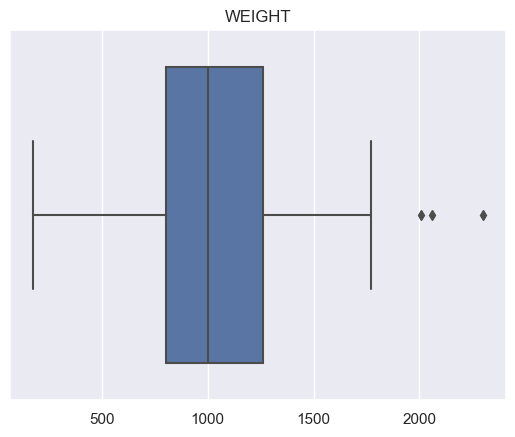

<Figure size 640x480 with 0 Axes>

In [105]:
# box plots

weight = sns.boxplot(x=df.WEIGHT.values, data=df, orient='h', width=0.8)
weight.set_title('WEIGHT')
plt.show()

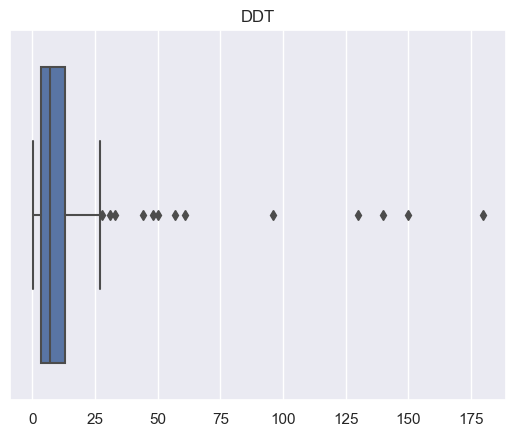

<Figure size 640x480 with 0 Axes>

In [104]:
ddt = sns.boxplot(x=df.DDT.values, data=df, orient='h')
ddt.set_title('DDT')
plt.show()

# clearly there are some outliers that may warrant further investigation

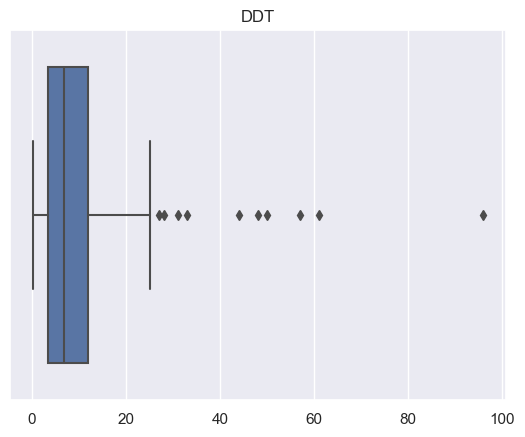

<Figure size 640x480 with 0 Axes>

In [103]:
# making dataframe without max values to see what it looks like, so less than 100
df_ddt = df[df['DDT']<100]
ddt = sns.boxplot(x=df_ddt.DDT.values, data=df_ddt, orient='h')
ddt.set_title('DDT')
plt.show()

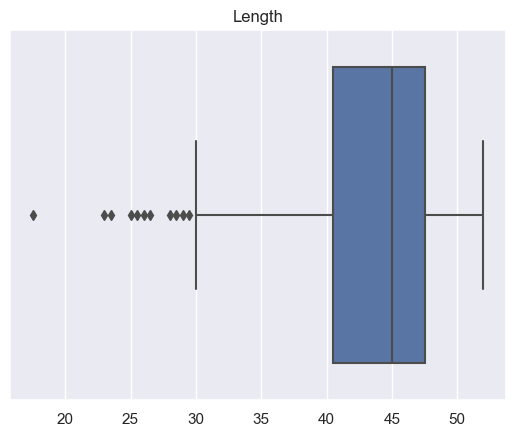

<Figure size 640x480 with 0 Axes>

In [102]:
length = sns.boxplot(x=df.LENGTH.values, width=0.8)
length.set_title('Length')
plt.show()

In [21]:
# lets look at the max ddt value
max_vals_ddt = df[df['DDT']> 100]
max_vals_ddt

,RIVER,MILE,SPECIES,LENGTH,WEIGHT,DDT
5,FCM,5,CCATFISH,52.0,1255,150.0
104,TRM,320,CCATFISH,49.5,1255,360.0
105,TRM,320,CCATFISH,47.0,1152,130.0
114,TRM,325,CCATFISH,46.0,863,1100.0
122,TRM,330,CCATFISH,51.5,1229,140.0
129,TRM,340,CCATFISH,45.0,911,180.0


In [22]:
max_vals_weight = df[df['WEIGHT']>2000]
max_vals_weight

,RIVER,MILE,SPECIES,LENGTH,WEIGHT,DDT
32,TRM,280,SMBUFFALO,52.0,2302,3.0
35,TRM,280,SMBUFFALO,48.0,2006,6.8
92,TRM,310,SMBUFFALO,48.5,2061,2.8


In [31]:
# frequency tables

In [20]:
df_freq = df.groupby('RIVER')['SPECIES'].value_counts().to_frame()
df_freq

SPECIES
RIVER SPECIES           
FCM   CCATFISH         6
LCM   CCATFISH         6
SCM   CCATFISH         6
TRM   CCATFISH        78
      SMBUFFALO       36
      LMBASS          12

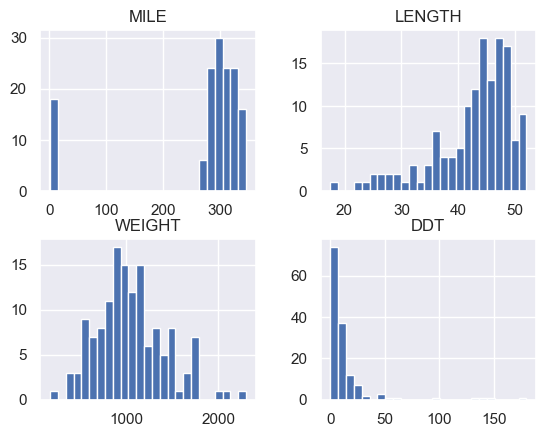

In [101]:
# HISTOGRAMS
# take out ddt outliers
df = df[df['DDT']<400]
df.hist(bins=25)

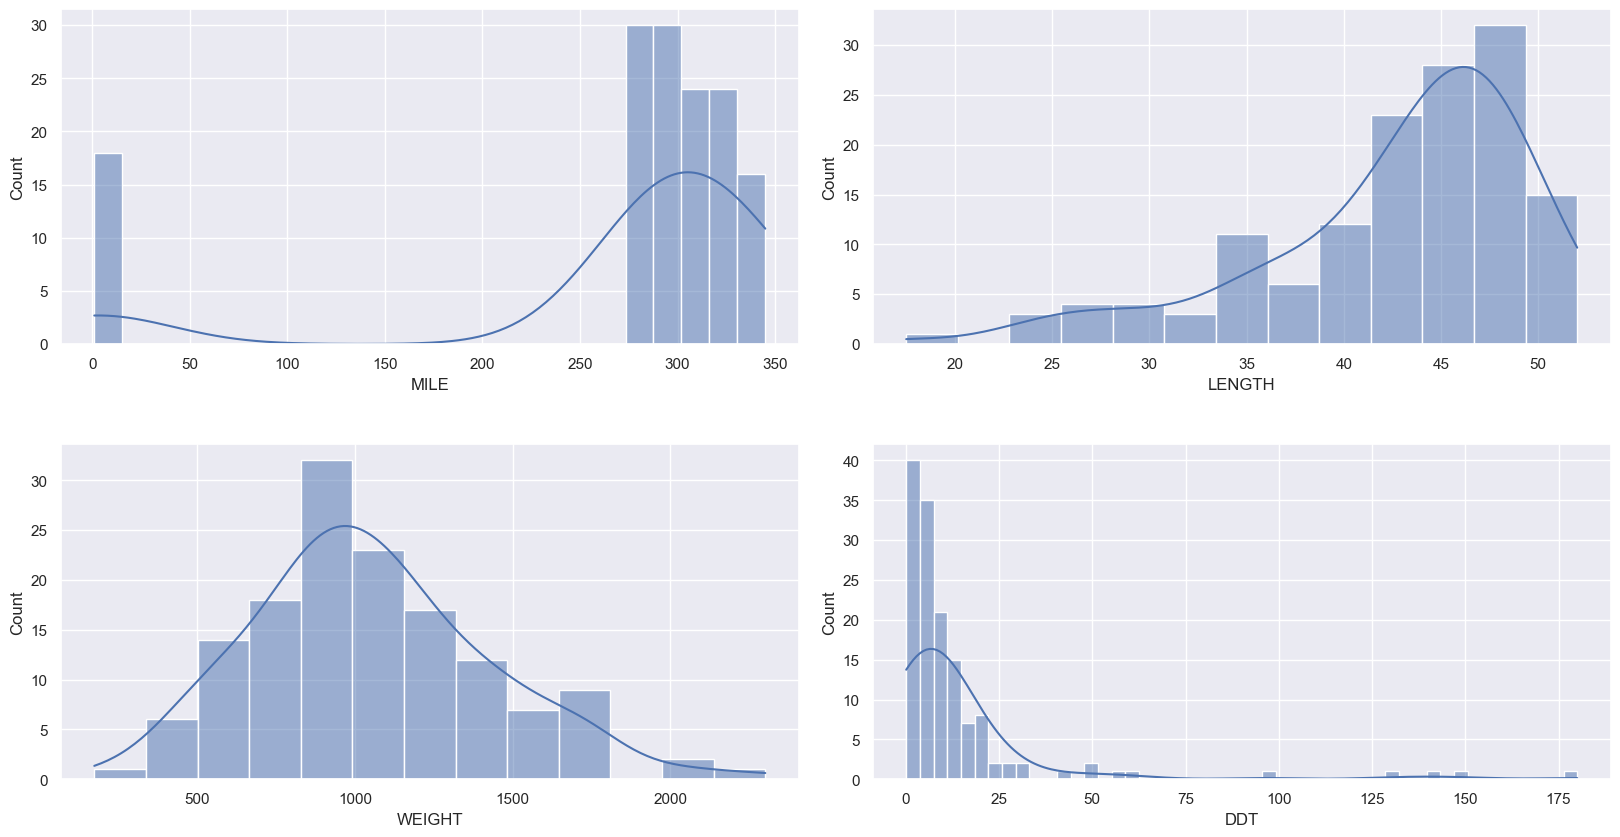

<Figure size 640x480 with 0 Axes>

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(wspace=0.1, hspace=0.3)

axes = axes.ravel()

for i, col in enumerate(df_num):
    sns.histplot(data = df[col], ax=axes[i], kde=True)
plt.show()

In [49]:
# value counts of MILE
print('# of unique values: ', df['MILE'].nunique())
print(df['MILE'].value_counts())
print('proportion under 200: ', len(df[df['MILE']<200])/len(df))

# of unique values:  17
300    12
310    12
280    12
285    12
290    12
320    11
340    10
330     8
315     6
5       6
305     6
3       6
295     6
275     6
1       6
345     6
325     5
Name: MILE, dtype: int64
proportion under 200:  0.1267605633802817


IDK, I don't like the way this column is distributed. I could just be a little too buzzed right now, but I am going to drop it for now...

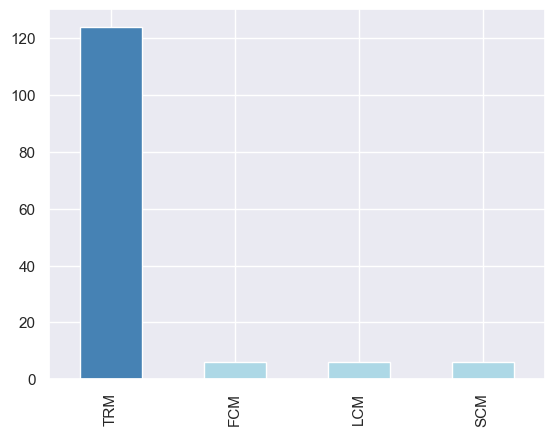

In [99]:
df.RIVER.value_counts().plot(kind='bar', color = ['steelblue', 'lightblue', 'lightblue', 'lightblue'])

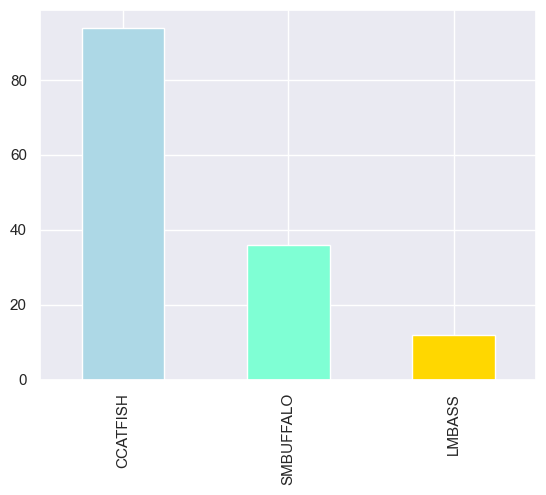

In [98]:
df.SPECIES.value_counts().plot(kind='bar', stacked=True, color=['lightblue', 'aquamarine', 'gold'])

In [83]:
df

,RIVER,MILE,SPECIES,LENGTH,WEIGHT,DDT
0,FCM,5,CCATFISH,42.5,732,10.00
1,FCM,5,CCATFISH,44.0,795,16.00
2,FCM,5,CCATFISH,41.5,547,23.00
3,FCM,5,CCATFISH,39.0,465,21.00
4,FCM,5,CCATFISH,50.5,1252,50.00
...,...,...,...,...,...,...
139,TRM,345,LMBASS,23.5,358,2.00
140,TRM,345,LMBASS,30.0,856,2.20
141,TRM,345,LMBASS,29.0,793,7.40
142,TRM,345,LMBASS,17.5,173,0.35


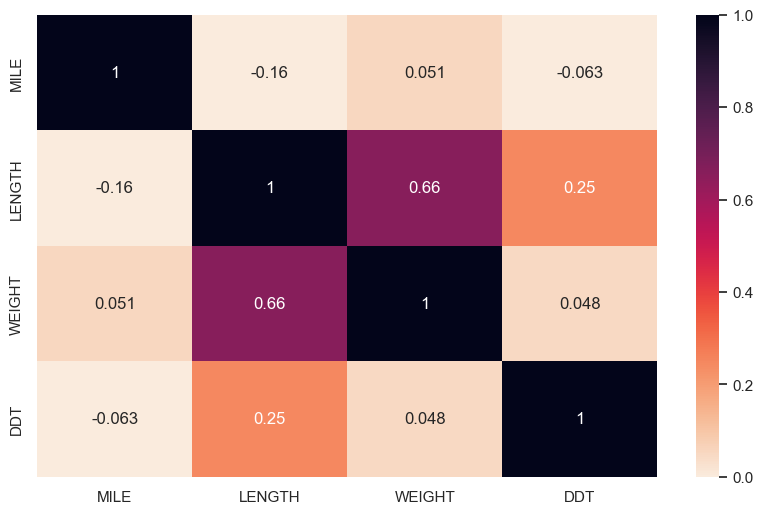

In [97]:
# set figure size
plt.figure(figsize=(10,6))

# correlation heatmap
sns.heatmap(df.corr(), annot=True, vmin=0, vmax=1, cmap="rocket_r")
plt.show()

### Notes: